In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visualization
import matplotlib.pyplot as plt

#Image Processing
import cv2

#Machine Learning
from sklearn.svm import SVC
from sklearn import metrics

#System
import os

#pickle untuk menyimpan dan memanggil model
import pickle

#library face_recognition
import face_recognition

In [2]:
nama = ["", "Nabilah", "Melody", "Ayana", "Jeje", "Kinal", "Ve", "Ghaida", "Shanju", "Gaby", "Frieska"]

def kenali(imagepath, model):
    import time
    
    detected_face = []
    bounding_box = []
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    #pencatatan waktu
    time_start = time.time()
    
    #Load Image
    face = face_recognition.load_image_file(imagepath)
    
    #Face Detection
    face_bounding_boxes = face_recognition.face_locations(face)
    
    #Cek jumlah wajah yang terdeteksi
    number_of_face = len(face_bounding_boxes)
    
    if number_of_face != 0:
        #Proses pengenalan untuk setiap wajah yang terdeteksi
        for i in range(number_of_face):
            test_image_enc = face_recognition.face_encodings(face)[i]
            
            #Kenali wajah siapakah itu (prediksi berdasarkan model clf)
            id_prediction = model.predict([test_image_enc])
            
            #Simpan hasil prediksi dan koordinat wajah
            detected_face.append(id_prediction[0])
            bounding_box.append(face_bounding_boxes[i])
            
    else:
        print("Tidak ada wajah yang terdeteksi")
    
    time_end = time.time()
              
    #untuk preview
    #membaca image
    img=cv2.imread(imagepath)
    index = 0
    for (y1,x2,y2,x1) in bounding_box:
        
        #membuat kotak (rectangle)
        cv2.rectangle(img,(x1,y1),(x2,y2),(0, 204, 255),2)
        
        #menampilkan label nama
        cv2.putText(img,nama[detected_face[index]],(x1,y1-10), font, 1, (0, 204, 255), 2, cv2.LINE_AA)
        index = index+1
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 15))
    plt.imshow(img_rgb)
    plt.show()  
    
    print(f"waktu yang diperlukan: {time_end - time_start} detik")

In [3]:
model_path= './model/model_JKT48.sav'
model = pickle.load(open(model_path, 'rb'))

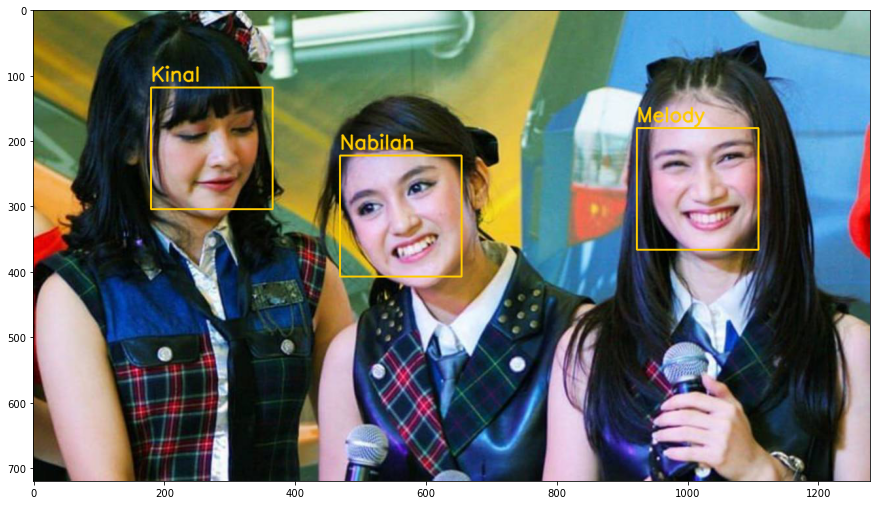

waktu yang diperlukan: 7.2944653034210205 detik


In [4]:
image_path = './images/JKT48/facetest/test_13.jpg'
kenali(image_path, model)

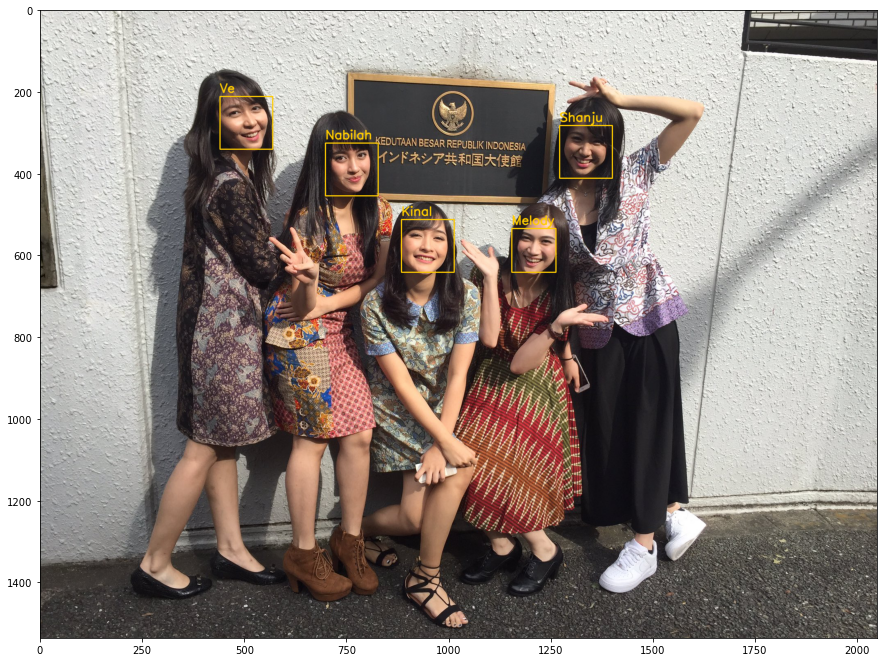

waktu yang diperlukan: 28.79160714149475 detik


In [6]:
image_path = './images/JKT48/facetest/test_5.jpg'
kenali(image_path, model)

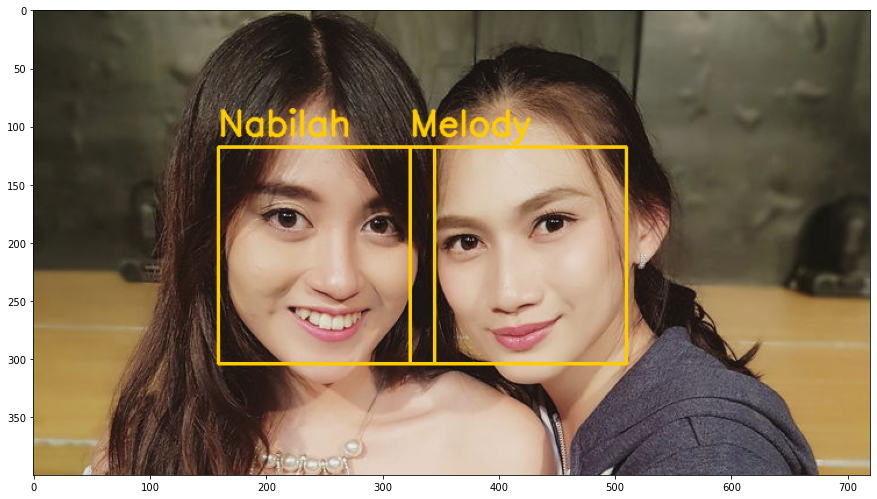

waktu yang diperlukan: 3.1946451663970947 detik


In [7]:
image_path = './images/JKT48/facetest/test_6.jpg'
kenali(image_path, model)

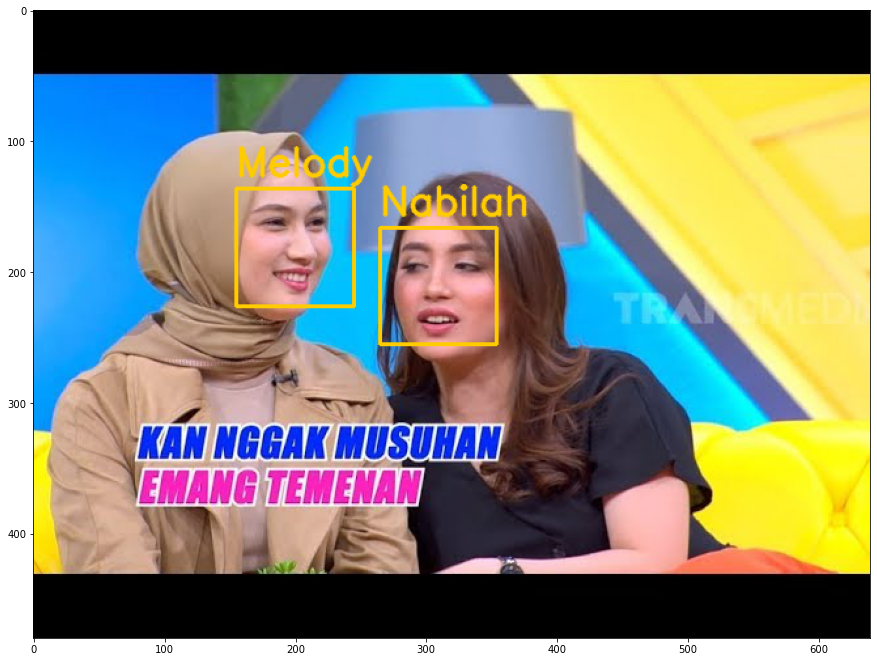

waktu yang diperlukan: 3.441725730895996 detik


In [8]:
image_path = './images/JKT48/facetest/test_8.jpg'
kenali(image_path, model)

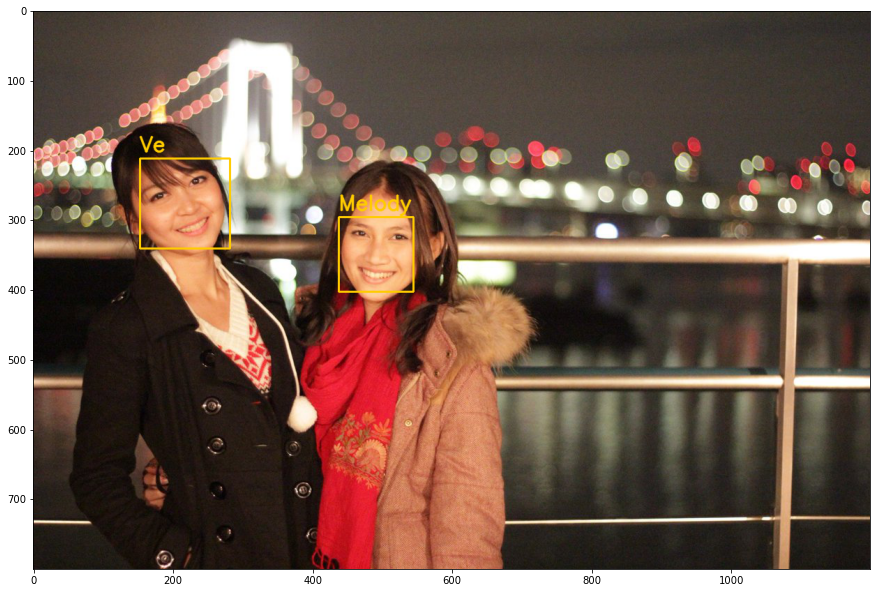

waktu yang diperlukan: 5.10849928855896 detik


In [9]:
image_path = './images/JKT48/facetest/test_16.jpg'
kenali(image_path, model)